In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

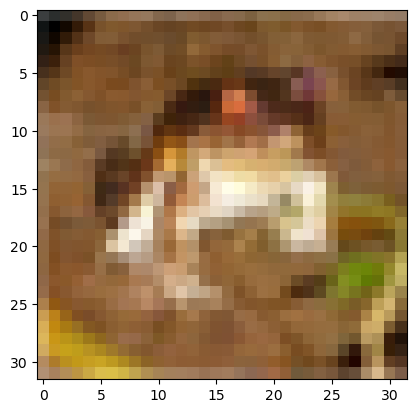

In [6]:
# FROG
plt.imshow(x_train[0])

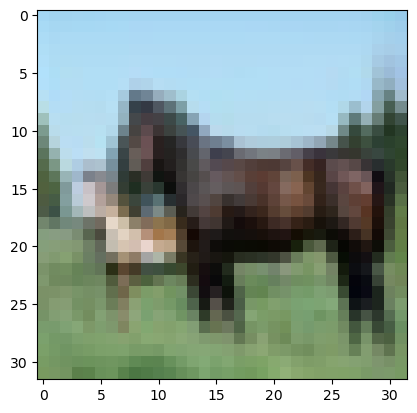

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [27]:
model.fit(x_train,y_cat_train,epochs=30,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5343 - accuracy: 0.4500 - val_loss: 1.5196 - val_accuracy: 0.4586
Epoch 2/30
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1662 - accuracy: 0.5922 - val_loss: 1.1288 - val_accuracy: 0.6093
Epoch 3/30
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0067 - accuracy: 0.6521 - val_loss: 1.0531 - val_accuracy: 0.6263
Epoch 4/30
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8962 - accuracy: 0.6904 - val_loss: 1.1191 - val_accuracy: 0.6274
Epoch 5/30
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8053 - accuracy: 0.7236 - val_loss: 1.2165 - val_accuracy: 0.5987
Epoch 6/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7334 - accuracy: 0.7494 - val_loss: 1.0113 - val_accuracy: 0.6590
Epoch 7/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6774 - accuracy: 0.7710 - val_loss: 1.1215 -

In [ ]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5')

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.534341,0.45004,1.519563,0.4586
1,1.166160,0.59218,1.128770,0.6093
2,1.006730,0.65210,1.053063,0.6263
3,0.896156,0.69036,1.119145,0.6274
4,0.805264,0.72362,1.216473,0.5987


<Axes: >

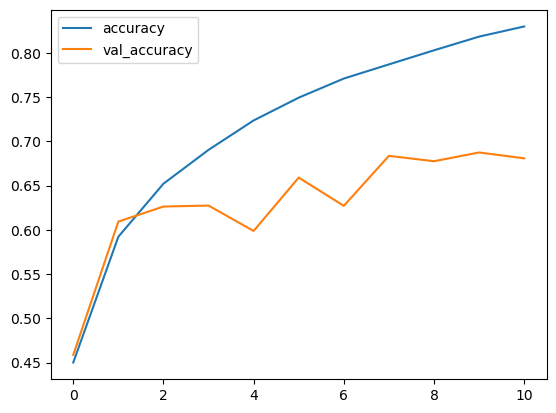

In [31]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

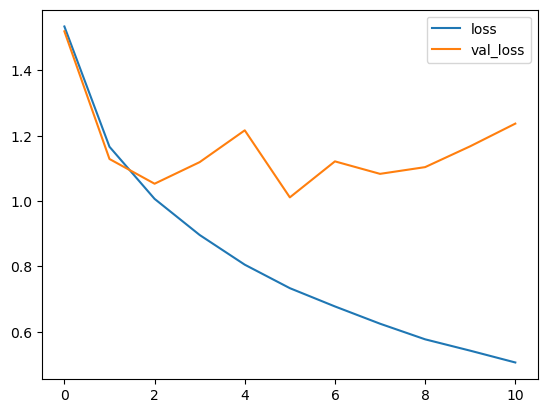

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.2370176315307617, 0.6808000206947327]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis=1)

313/313 [==============================] - 1s 3ms/step


In [36]:
print(classification_report(y_test,predictions,digits=4))

              precision    recall  f1-score   support

           0     0.6186    0.8060    0.7000      1000
           1     0.8928    0.6830    0.7739      1000
           2     0.5772    0.5870    0.5821      1000
           3     0.4772    0.5020    0.4893      1000
           4     0.6799    0.6520    0.6656      1000
           5     0.5416    0.6060    0.5720      1000
           6     0.7600    0.7440    0.7519      1000
           7     0.8371    0.6680    0.7430      1000
           8     0.8084    0.7850    0.7965      1000
           9     0.7473    0.7750    0.7609      1000

    accuracy                         0.6808     10000
   macro avg     0.6940    0.6808    0.6835     10000
weighted avg     0.6940    0.6808    0.6835     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[806,   9,  38,  19,  20,   5,  12,   5,  52,  34],
       [ 49, 683,  17,  28,   4,  10,  20,   4,  47, 138],
       [102,   5, 587,  79,  63,  72,  59,  18,   7,   8],
       [ 46,   3,  75, 502,  63, 204,  54,  21,  13,  19],
       [ 37,   2, 101,  66, 652,  62,  26,  39,  12,   3],
       [ 30,   1,  64, 193,  42, 606,  24,  28,   7,   5],
       [ 15,   4,  73,  71,  43,  35, 744,   5,   4,   6],
       [ 41,   1,  41,  53,  60,  96,  10, 668,   8,  22],
       [111,  19,  12,  18,   7,  10,  10,   1, 785,  27],
       [ 66,  38,   9,  23,   5,  19,  20,   9,  36, 775]], dtype=int64)

<Axes: >

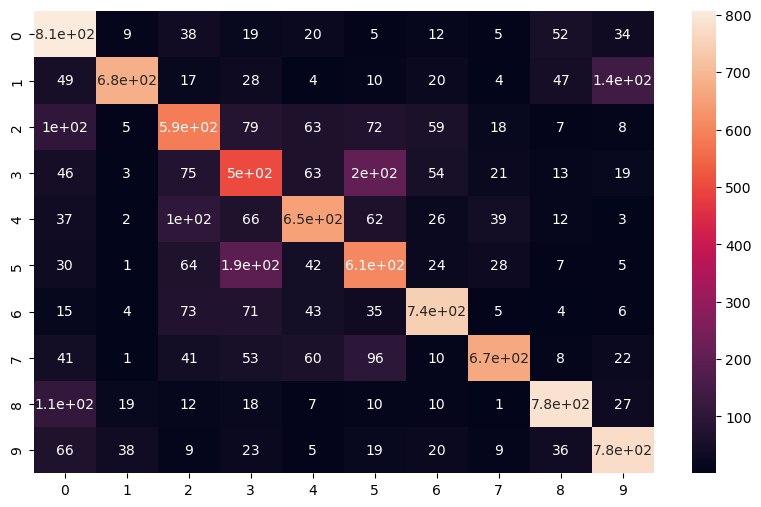

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [39]:
my_image = x_test[16]

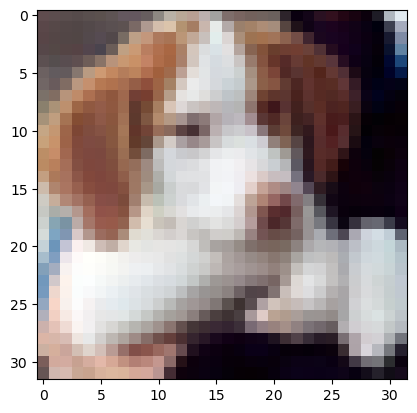

In [40]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)
pred = model.predict(my_image.reshape(1,32,32,3))
pred = np.argmax(pred,axis=1)
pred

1/1 [==============================] - 0s 16ms/step


array([5], dtype=int64)

In [42]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html 